In [15]:
#Just to combine Insat data For 1 day

import pandas as pd
from scipy.interpolate import griddata

# Load your data into pandas DataFrames
insat_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/INSAT_CSV/20180101_data.csv")
imerg_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/IMERG_CSV/20170101.csv")

# Define the grid for IMERG data
imerg_grid_x = imerg_data['longitude'].values
imerg_grid_y = imerg_data['latitude'].values

# Define the grid for INSAT data
insat_grid_x = insat_data['longitude'].values
insat_grid_y = insat_data['latitude'].values

# Interpolate INSAT data onto the grid of IMERG data
insat_on_imerg = {}
for column in insat_data.columns[2:]:
    insat_values = insat_data[column].values
    insat_on_imerg[column] = griddata(
        (insat_grid_x, insat_grid_y),
        insat_values,
        (imerg_grid_x, imerg_grid_y),
        method='linear'
    )

# Create a DataFrame for interpolated INSAT data
insat_on_imerg_df = pd.DataFrame(insat_on_imerg)
insat_on_imerg_df.insert(0, 'longitude', imerg_grid_x)
insat_on_imerg_df.insert(1, 'latitude', imerg_grid_y)

# Save interpolated INSAT data to a CSV file
insat_on_imerg_df.to_csv("interpolated_insat_on_imerg.csv", index=False)


In [10]:
#To combine 1 day data of INSAT and IMERG data with regriding

import pandas as pd
from scipy.interpolate import griddata

# Load your data into pandas DataFrames
insat_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/INSAT_CSV/20180101_data.csv")
imerg_data = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/IMERG_CSV/20170101.csv")

# Define the grid for IMERG data
imerg_grid_x = imerg_data['longitude'].values
imerg_grid_y = imerg_data['latitude'].values

# Define the grid for INSAT data
insat_grid_x = insat_data['longitude'].values
insat_grid_y = insat_data['latitude'].values

# Interpolate INSAT data onto the grid of IMERG data
insat_on_imerg = {}
for column in insat_data.columns[2:]:
    insat_values = insat_data[column].values
    insat_on_imerg[column] = griddata(
        (insat_grid_x, insat_grid_y),
        insat_values,
        (imerg_grid_x, imerg_grid_y),
        method='linear'
    )

# Create a DataFrame for interpolated INSAT data
insat_on_imerg_df = pd.DataFrame(insat_on_imerg)
insat_on_imerg_df.insert(0, 'longitude', imerg_grid_x)
insat_on_imerg_df.insert(1, 'latitude', imerg_grid_y)

# Add precipitationCal from IMERG data to the DataFrame
insat_on_imerg_df['precipitationCal'] = imerg_data['precipitationCal']

# Save the combined DataFrame to a CSV file
insat_on_imerg_df.to_csv("interpolated_insat_on_imerg.csv", index=False)


KeyError: '20180101 IMG_TIR1'

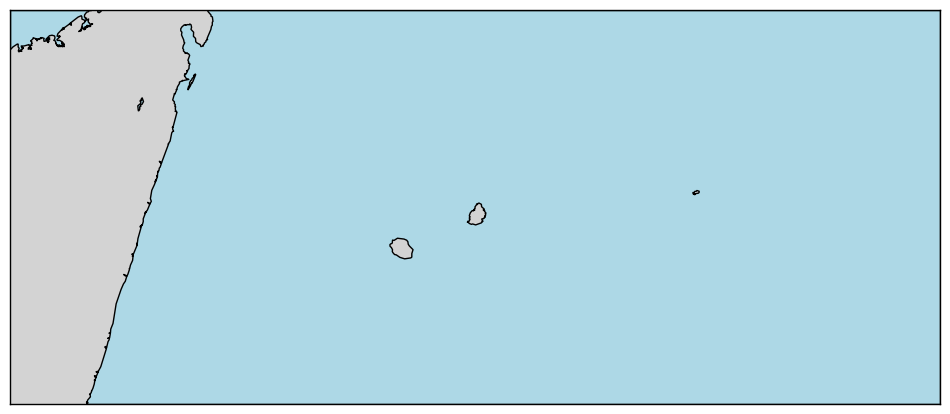

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the data from the CSV file
df = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/Interpolated_CSV/interpolated_insat_on_imerg_20180101.csv")

# Get unique time stamps
time_stamps = [col.split(' ')[0] for col in df.columns if 'IMG' in col]
time_stamps = sorted(set(time_stamps))

# Create a figure
plt.figure(figsize=(12, 8))

# Define the map boundaries
lon_min, lon_max = df['longitude'].min(), df['longitude'].max()
lat_min, lat_max = df['latitude'].min(), df['latitude'].max()

# Create a Basemap object
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i')

# Plot the map
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Plot each variable for each time stamp
for timestamp in time_stamps:
    x, y = m(df['longitude'].values, df['latitude'].values)
    img_tir1 = df[timestamp + ' IMG_TIR1'].values
    img_tir2 = df[timestamp + ' IMG_TIR2'].values
    img_wv = df[timestamp + ' IMG_WV'].values
    precipitation_cal = df['precipitationCal'].values
    
    # Normalize the variables
    img_tir1_norm = (img_tir1 - img_tir1.min()) / (img_tir1.max() - img_tir1.min())
    img_tir2_norm = (img_tir2 - img_tir2.min()) / (img_tir2.max() - img_tir2.min())
    img_wv_norm = (img_wv - img_wv.min()) / (img_wv.max() - img_wv.min())
    precipitation_cal_norm = (precipitation_cal - precipitation_cal.min()) / (precipitation_cal.max() - precipitation_cal.min())
    
    # Plot each variable with different colors
    plt.scatter(x, y, c=img_tir1_norm, cmap='Reds', alpha=0.5, label='IMG_TIR1')
    plt.scatter(x, y, c=img_tir2_norm, cmap='Greens', alpha=0.5, label='IMG_TIR2')
    plt.scatter(x, y, c=img_wv_norm, cmap='Blues', alpha=0.5, label='IMG_WV')
    plt.scatter(x, y, c=precipitation_cal_norm, cmap='YlOrBr', alpha=0.5, label='precipitationCal')

# Add colorbars for each variable
plt.colorbar(label='Normalized Value')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
#To combine all data for same day and 1 day behind data of INSAT and IMERG data with regriding

import os
import pandas as pd
from scipy.interpolate import griddata
from datetime import datetime, timedelta

# Define the directories containing INSAT and IMERG files
insat_directory = "/Users/kunalpathak9826/Desktop/ISRO/Data/INSAT_CSV"
imerg_directory = "/Users/kunalpathak9826/Desktop/ISRO/Data/IMERG_CSV"
output_directory = "/Users/kunalpathak9826/Desktop/ISRO/Data/Interpolated_CSV"

# Function to process files with the same date from both directories
def process_files(insat_file, imerg_file):
    # Load INSAT and IMERG data into pandas DataFrames
    insat_data = pd.read_csv(insat_file)
    imerg_data = pd.read_csv(imerg_file)

    # Define the grid for IMERG data
    imerg_grid_x = imerg_data['longitude'].values
    imerg_grid_y = imerg_data['latitude'].values

    # Define the grid for INSAT data
    insat_grid_x = insat_data['longitude'].values
    insat_grid_y = insat_data['latitude'].values

    # Interpolate INSAT data onto the grid of IMERG data
    insat_on_imerg = {}
    for column in insat_data.columns[2:]:
        insat_values = insat_data[column].values
        insat_on_imerg[column] = griddata(
            (insat_grid_x, insat_grid_y),
            insat_values,
            (imerg_grid_x, imerg_grid_y),
            method='linear'
        )

    # Create a DataFrame for interpolated INSAT data
    insat_on_imerg_df = pd.DataFrame(insat_on_imerg)
    insat_on_imerg_df.insert(0, 'longitude', imerg_grid_x)
    insat_on_imerg_df.insert(1, 'latitude', imerg_grid_y)

    # Add precipitationCal from IMERG data to the DataFrame
    insat_on_imerg_df['precipitationCal'] = imerg_data['precipitationCal']

    # Extract date from the filename
    insat_date = os.path.basename(insat_file).split("_")[0]
    imerg_date = os.path.basename(imerg_file).split(".")[0]  # Remove extension

    # Save the combined DataFrame to a CSV file
    output_file = os.path.join(output_directory, f"interpolated_insat_on_imerg_{insat_date}.csv")
    insat_on_imerg_df.to_csv(output_file, index=False)
    print(f"Processed files for INSAT date: {insat_date}, IMERG date: {imerg_date}")

# Iterate over INSAT files
for insat_file in os.listdir(insat_directory):
    if insat_file.endswith(".csv"):
        # Extract date from INSAT filename
        insat_date = os.path.basename(insat_file).split("_")[0]
        
        # Convert INSAT date string to datetime object
        insat_datetime = datetime.strptime(insat_date, "%Y%m%d")
        
        # Subtract one day from the INSAT date
        imerg_datetime = insat_datetime + timedelta(days=1)
        
        # Format IMERG date string
        imerg_date = imerg_datetime.strftime("%Y%m%d")
        
        # Search for corresponding IMERG file with the modified date
        imerg_file = os.path.join(imerg_directory, f"{imerg_date}.csv")
        
        # Process files if corresponding IMERG file exists
        if os.path.exists(imerg_file):
            process_files(os.path.join(insat_directory, insat_file), imerg_file)


Processed files for INSAT date: 20180101, IMERG date: 20180102
Processed files for INSAT date: 20181222, IMERG date: 20181223
Processed files for INSAT date: 20180408, IMERG date: 20180409


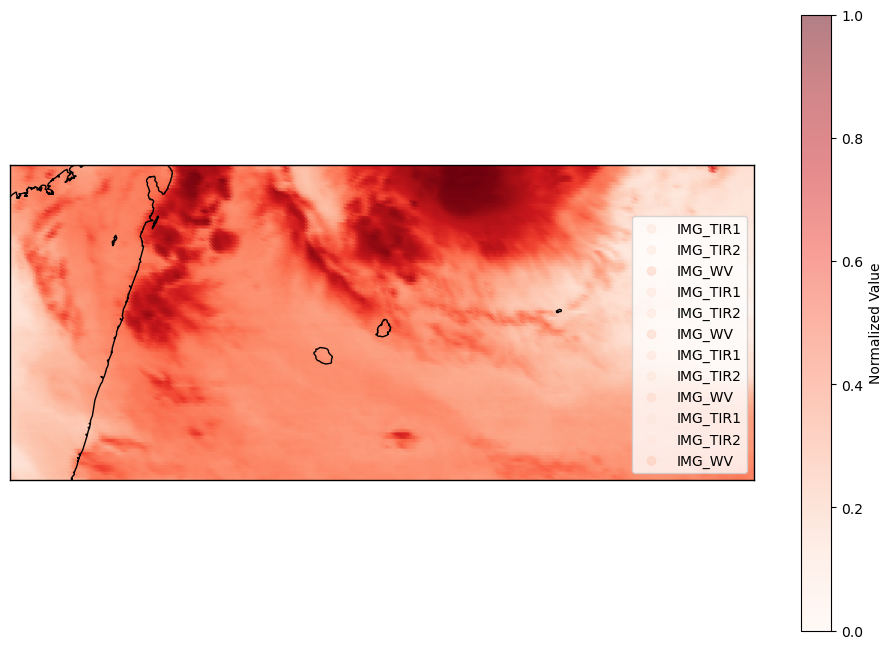

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the data from the CSV file
df = pd.read_csv("/Users/kunalpathak9826/Desktop/ISRO/Data/Interpolated_CSV/interpolated_insat_on_imerg_20180101.csv")

# Get unique time stamps
time_stamps = [col.split(' ')[0] for col in df.columns if 'IMG' in col]
time_stamps = sorted(set(time_stamps))

# Create a figure
plt.figure(figsize=(12, 8))

# Define the map boundaries
lon_min, lon_max = df['longitude'].min(), df['longitude'].max()
lat_min, lat_max = df['latitude'].min(), df['latitude'].max()

# Create a Basemap object
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i')

# Plot the map
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Plot each variable for each time stamp
for timestamp in time_stamps:
    x, y = m(df['longitude'].values, df['latitude'].values)
    for col in df.columns:
        if timestamp in col and 'IMG' in col:
            variable = col.split(' ')[-1]
            values = df[col].values
            # Normalize the variable
            values_norm = (values - values.min()) / (values.max() - values.min())
            # Plot the variable
            plt.scatter(x, y, c=values_norm, cmap='Reds', alpha=0.5, label=variable)

# Add colorbar for the variables
plt.colorbar(label='Normalized Value')

# Add legend
plt.legend()

# Show the plot
plt.show()
